# Washington State Electric Vehicle Data
- Analysis here

## Q1: Popularity of EV models and Correlation of EVs and Electric Range

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from pathlib import Path
import numpy as np

# Data file path
EV_path = "Resources/Electric_Vehicle_Population_Data.csv"

# Read the CSV into a Pandas DataFrame
EV_df = pd.read_csv(EV_path, low_memory=False)

# Print the first five rows of data to the screen
EV_df.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5UXTA6C0XM,Kitsap,Seabeck,WA,98380.0,2021,BMW,X5,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,30.0,0.0,35.0,267929112,POINT (-122.8728334 47.5798304),PUGET SOUND ENERGY INC,5.303509e+10
1,5YJ3E1EB1J,Kitsap,Poulsbo,WA,98370.0,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215.0,0.0,23.0,475911439,POINT (-122.6368884 47.7469547),PUGET SOUND ENERGY INC,5.303509e+10
2,WP0AD2A73G,Snohomish,Bothell,WA,98012.0,2016,PORSCHE,PANAMERA,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,15.0,0.0,1.0,101971278,POINT (-122.206146 47.839957),PUGET SOUND ENERGY INC,5.306105e+10
3,5YJ3E1EB5J,Kitsap,Bremerton,WA,98310.0,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215.0,0.0,23.0,474363746,POINT (-122.6231895 47.5930874),PUGET SOUND ENERGY INC,5.303508e+10
4,1N4AZ1CP3K,King,Redmond,WA,98052.0,2019,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,150.0,0.0,45.0,476346482,POINT (-122.13158 47.67858),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10


In [3]:
# Create a field to keep tracl of both Make and Model of the EV and then grouped the initial dataset to the count per Make_Model to create the popularity bar chart
EV_df['Make_Model']=EV_df['Make']+' / ' +EV_df['Model']
groupedEV_count = EV_df.groupby('Make_Model')['VIN (1-10)'].count().reset_index(name='Count')
groupedEV_count.head()

,Make_Model,Count
0,ACURA / ZDX,61
1,ALFA ROMEO / TONALE,84
2,AUDI / A3,567
3,AUDI / A7 E,11
4,AUDI / A8 E,3


In [5]:
# Values for the grouped EV dataframe were sorted and only the top 15 were kept to create the popularity bar graph
groupedEV_count = groupedEV_count.sort_values(by='Count', ascending=False)
popularEV_15=groupedEV_count.head(15)
popularEV_15.head(15)

,Make_Model,Count
133,TESLA / MODEL Y,44038
130,TESLA / MODEL 3,32520
113,NISSAN / LEAF,13606
131,TESLA / MODEL S,7795
37,CHEVROLET / BOLT EV,6780
132,TESLA / MODEL X,6239
41,CHEVROLET / VOLT,4815
143,VOLKSWAGEN / ID.4,4716
53,FORD / MUSTANG MACH-E,4363
76,JEEP / WRANGLER,4116


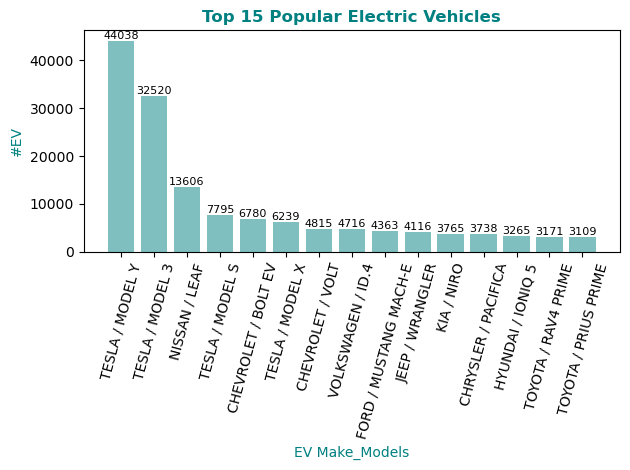

In [7]:
# Create array for x-axis
x_axis = np.arange(len(popularEV_15))

# Tell matplotlib that we will be making a bar chart
# We apply align="center" to ensure our bars line up with our tick marks

bars = plt.bar(x_axis, popularEV_15["Count"], color='teal', alpha=0.5, align="center")

# Tell matplotlib where we would like to place each of our x axis headers
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations,popularEV_15["Make_Model"] ,rotation=75)

# Give our chart some labels and a tile
plt.title("Top 15 Popular Electric Vehicles",color="teal",fontweight='bold')
plt.xlabel("EV Make_Models",color="teal")
plt.ylabel("#EV",color="teal")

# Add values on top of the bars
for bar in bars:
    yval = bar.get_height()  # Get the height of the bar
    plt.text(bar.get_x() + bar.get_width() / 2, yval, yval, 
             ha='center', va='bottom',fontsize=8,color="black")  # Add text at the top of the bar
    
plt.tight_layout()
plt.savefig("Outputs/Top15_Popular_EVs.png")
plt.show()


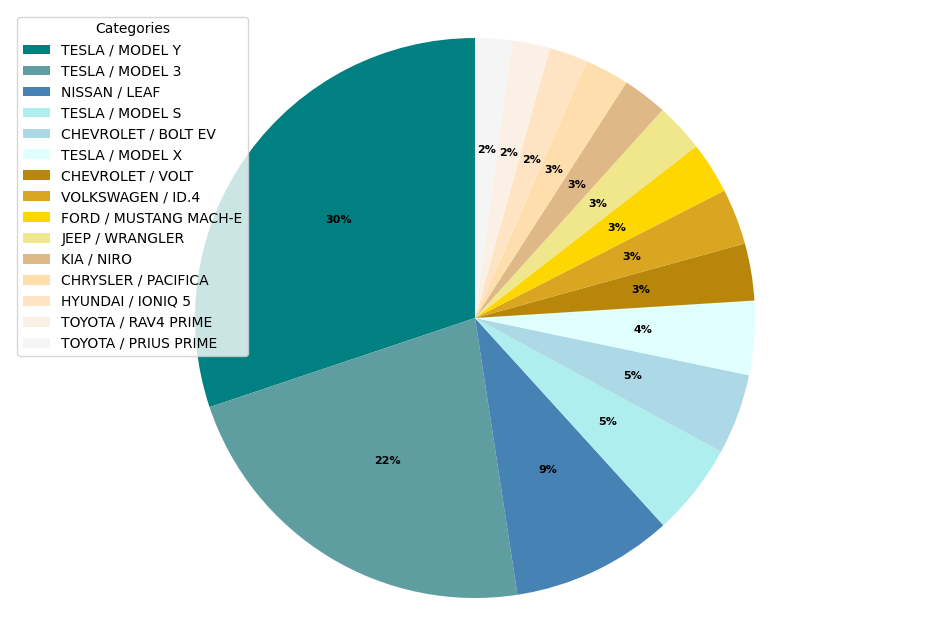

In [9]:
labels=popularEV_15['Make_Model']
sizes=popularEV_15['Count']
colors = [
    "teal",
    "cadetblue",
    "steelblue",
    "paleturquoise",
    "lightblue",
    "lightcyan",
    "darkgoldenrod",
    "goldenrod",
    "gold",
    "khaki",
    "burlywood",
    "navajowhite",
    "bisque",
    "linen",
    "whitesmoke"
]
plt.figure(figsize=(12, 8))
wedges, texts, autotexts = plt.pie(sizes, colors=colors, autopct='%1.0f%%', startangle=90)
plt.setp(texts, size=10)  # Set size of the labels
plt.setp(autotexts, size=8, weight='bold', color='black')  # Style the percentage labels
plt.legend(wedges, labels, title="Categories", loc="best", fontsize=10)
plt.axis("equal")
plt.savefig("Outputs/Top15_Popular_EVs%Pie.png")
plt.show()


In [11]:
# Narrowed down the initial list with only Make_Models that have an Electric Range >0 and created a summary statistics to determine which cars will be used for the Electric Range vs Poularity correlation
ev_popularity_stats=EV_df[EV_df["Electric Range"]>0]

summary_stats = ['mean','median','var','std','sem']
agg_ev_popularity=ev_popularity_stats.groupby(['Make_Model']).agg({'Electric Range': summary_stats})

agg_ev_popularity.columns = ['_'.join(col).strip() for col in agg_ev_popularity.columns.values]
agg_ev_popularity.to_csv("Outputs/summarystats.csv")
agg_ev_popularity

,Electric Range_mean,Electric Range_median,Electric Range_var,Electric Range_std,Electric Range_sem
Make_Model,,,,,
ALFA ROMEO / TONALE,33.000000,33.0,0.000000,0.000000,0.000000
AUDI / A3,16.000000,16.0,0.000000,0.000000,0.000000
AUDI / A7 E,24.000000,24.0,0.000000,0.000000,0.000000
AUDI / A8 E,17.000000,17.0,0.000000,0.000000,0.000000
AUDI / E-TRON,207.693721,204.0,52.924454,7.274920,0.284690
...,...,...,...,...,...
VOLVO / S90,24.777778,21.0,51.377778,7.167829,1.194638
VOLVO / V60,38.354430,41.0,43.821487,6.619780,0.744783
VOLVO / XC60,26.923414,35.0,74.863473,8.652368,0.233677


In [13]:
#Keep Make_models with sem <0.1
cars_for_correlation = agg_ev_popularity[agg_ev_popularity["Electric Range_sem"]<0.1]
selected_cars = cars_for_correlation.iloc[:,[0]]
selected_cars.head()

,Electric Range_mean
Make_Model,
ALFA ROMEO / TONALE,33.0
AUDI / A3,16.0
AUDI / A7 E,24.0
AUDI / A8 E,17.0
AUDI / E-TRON SPORTBACK,218.0


In [15]:
#Merge the selected cars and the grouped cars to create a table for the correlation 

merge = pd.merge(groupedEV_count,selected_cars, on='Make_Model', how='left')
merge1 = merge.dropna()
merge1=merge1.reset_index(drop=True)
#merge1

y = 0.01x +48.47
The r^2-value is: 0.2220167159514019


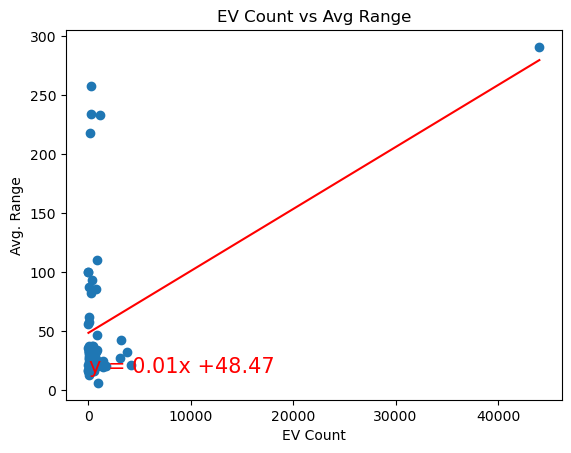

In [17]:
# Create x and y values for the correlation chart
x_values = merge1['Count']
y_values = merge1['Electric Range_mean']

# Perform a linear regression on Model Count vs. Average Range
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
#print(regress_values)

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('EV Count')
plt.ylabel('Avg. Range')
plt.annotate(line_eq,(20,15),fontsize=15,color="red")
plt.title(f"EV Count vs Avg Range")

# Print r^2 value
print(f"The r^2-value is: {rvalue**2}")

# Show plot
plt.savefig("Outputs/EVcount_VS_AvgElectricRange.png")
plt.show()


In [ ]:
# While it's not very high, 22% suggests that the model explains some variability, but there’s a significant amount of unexplained variance (78%). 
# This means other factors or variables not included in the model may play a role in influencing the "popularity" of EVs.

## Q2: Correlation of number of EV's per County vs. County Income

## Q3: Correlation of number of EV's per County vs. County Population Size

## Q4: Map of Cars per County

## Q5: Map of EV Charging Stations in WA

## Q6: Trend of EV Purchases Over Time

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path


# Load the dataset from the URL

url = "https://data.wa.gov/api/views/rpr4-cgyd/rows.csv?accessType=DOWNLOAD"
title_registration_data = pd.read_csv(url)

# Inspect the dataset structure
title_registration_data.head()

,Clean Alternative Fuel Vehicle Type,VIN (1-10),DOL Vehicle ID,Model Year,Make,Model,Primary Use,Electric Range,Odometer Reading,Odometer Reading Description,...,Meets 2019 HB 2042 Sale Price/Value Requirement,2019 HB 2042: Battery Range Requirement,2019 HB 2042: Purchase Date Requirement,2019 HB 2042: Sale Price/Value Requirement,Electric Vehicle Fee Paid,Transportation Electrification Fee Paid,Hybrid Vehicle Electrification Fee Paid,2020 GEOID,Legislative District,Electric Utility
0,Battery Electric Vehicle (BEV),1N4BZ0CP3G,348273537,2016,NISSAN,Leaf,Passenger,84.0,44004,Actual Mileage,...,False,Battery range requirement is met,This transaction type is not eligible for the ...,This transaction type is not eligible for the ...,Not Applicable,Not Applicable,Not Applicable,5.303195e+10,24.0,BONNEVILLE POWER ADMINISTRATION||PUGET SOUND E...
1,Battery Electric Vehicle (BEV),5YJ3E1EB7K,244708467,2019,TESLA,Model 3,Passenger,220.0,0,Odometer reading is not collected at time of r...,...,False,Battery range requirement is met,This transaction type is not eligible for the ...,This transaction type is not eligible for the ...,No,No,No,5.303302e+10,48.0,PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)
2,Battery Electric Vehicle (BEV),5YJ3E1EB7K,244708467,2019,TESLA,Model 3,Passenger,220.0,50,Actual Mileage,...,False,Battery range requirement is met,"Vehicle purchase was before August 01, 2019",The sale price is too high,Not Applicable,Not Applicable,Not Applicable,5.303302e+10,48.0,PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)
3,Battery Electric Vehicle (BEV),1N4AZ1CPXK,4664348,2019,NISSAN,Leaf,Passenger,150.0,0,Odometer reading is not collected at time of r...,...,False,Battery range requirement is met,This transaction type is not eligible for the ...,This transaction type is not eligible for the ...,Yes,Yes,No,5.303303e+10,5.0,PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)
4,Plug-in Hybrid Electric Vehicle (PHEV),YV4H600A3P,227359303,2023,VOLVO,XC90,Passenger,32.0,0,Odometer reading is not collected at time of r...,...,False,Battery range requirement is met,This transaction type is not eligible for the ...,This transaction type is not eligible for the ...,Yes,Yes,No,5.303303e+10,5.0,PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)


In [10]:
# Filter the dataset to only include rows where 'New or Used Vehicle' is 'New'
new_vehicles_data = title_registration_data[title_registration_data['New or Used Vehicle'] == 'New']

# Display the head of the filtered data
new_vehicles_data.head()

,Clean Alternative Fuel Vehicle Type,VIN (1-10),DOL Vehicle ID,Model Year,Make,Model,Primary Use,Electric Range,Odometer Reading,Odometer Reading Description,...,Meets 2019 HB 2042 Sale Price/Value Requirement,2019 HB 2042: Battery Range Requirement,2019 HB 2042: Purchase Date Requirement,2019 HB 2042: Sale Price/Value Requirement,Electric Vehicle Fee Paid,Transportation Electrification Fee Paid,Hybrid Vehicle Electrification Fee Paid,2020 GEOID,Legislative District,Electric Utility
1,Battery Electric Vehicle (BEV),5YJ3E1EB7K,244708467,2019,TESLA,Model 3,Passenger,220.0,0,Odometer reading is not collected at time of r...,...,False,Battery range requirement is met,This transaction type is not eligible for the ...,This transaction type is not eligible for the ...,No,No,No,5.303302e+10,48.0,PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)
2,Battery Electric Vehicle (BEV),5YJ3E1EB7K,244708467,2019,TESLA,Model 3,Passenger,220.0,50,Actual Mileage,...,False,Battery range requirement is met,"Vehicle purchase was before August 01, 2019",The sale price is too high,Not Applicable,Not Applicable,Not Applicable,5.303302e+10,48.0,PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)
6,Plug-in Hybrid Electric Vehicle (PHEV),YV4H600A3P,227359303,2023,VOLVO,XC90,Passenger,32.0,0,Odometer reading is not collected at time of r...,...,False,Battery range requirement is met,This transaction type is not eligible for the ...,This transaction type is not eligible for the ...,No,No,No,5.303303e+10,5.0,PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)
13,Battery Electric Vehicle (BEV),JN1AZ0CP6B,101926373,2011,NISSAN,Leaf,Passenger,73.0,5,Actual Mileage,...,False,Battery range requirement is met,This transaction type is not eligible for the ...,This transaction type is not eligible for the ...,No,NaN,NaN,5.303301e+10,37.0,CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA)
49,Battery Electric Vehicle (BEV),JN1AZ0CP6B,101926373,2011,NISSAN,Leaf,Passenger,73.0,5,Actual Mileage,...,False,Battery range requirement is met,"Vehicle purchase was before August 01, 2019",The sale price is not available,Not Applicable,NaN,NaN,5.303301e+10,37.0,CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA)


In [11]:
# Select only the relevant columns
cleaned_data = new_vehicles_data[['VIN (1-10)', 'DOL Vehicle ID', 'Model Year', 'Make', 'Model', 
                                        'New or Used Vehicle', 'Sale Date', 'Transaction Type', 
                                        'Transaction Date', 'Year', 'County', 'City', 'Postal Code']]

# Remove duplicates based on the 'VIN (1-10)' column
cleaned_new_vehicles = cleaned_data.drop_duplicates(subset='VIN (1-10)', keep='first').reset_index()

# Save the cleaned data to a new CSV file in 'Resources'
cleaned_new_vehicles.to_csv('Resources/cleaned_new_vehicle_data.csv', index=False)

# Display the first few rows of the cleaned dataset without duplicates
cleaned_new_vehicles

,index,VIN (1-10),DOL Vehicle ID,Model Year,Make,Model,New or Used Vehicle,Sale Date,Transaction Type,Transaction Date,Year,County,City,Postal Code
0,1,5YJ3E1EB7K,244708467,2019,TESLA,Model 3,New,NaN,Original Registration,February 28 2019,2019,King,BELLEVUE,98007.0
1,6,YV4H600A3P,227359303,2023,VOLVO,XC90,New,NaN,Original Registration,December 22 2022,2022,King,ISSAQUAH,98027.0
2,13,JN1AZ0CP6B,101926373,2011,NISSAN,Leaf,New,February 28 2011,Original Registration,April 19 2011,2011,King,SEATTLE,98134.0
3,71,5YJYGDEE7M,176302234,2021,TESLA,Model Y,New,August 28 2021,Original Title,September 21 2021,2021,King,RENTON,98059.0
4,74,1G1FY6S09P,261162457,2023,CHEVROLET,Bolt EUV,New,NaN,Original Registration,January 25 2024,2024,King,SEATTLE,98125.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11657,1167341,1G6RP1E42E,217801853,2014,CADILLAC,ELR,New,April 26 2014,Original Title,May 05 2014,2014,Yakima,SELAH,98942.0
11658,1169409,5YJRE1A30A,158201522,2010,TESLA,Roadster,New,August 20 2010,Original Title,September 29 2010,2010,King,SEATTLE,98103.0
11659,1169436,YH4K14AA2C,157201656,2012,FISKER,Karma,New,April 16 2012,Original Title,May 08 2012,2012,King,BELLEVUE,98004.0
11660,1171112,7FCTGAAL4R,267084310,2024,RIVIAN,R1T,New,May 09 2024,Original Title,June 21 2024,2024,Snohomish,BOTHELL,98012.0


In [12]:
#File location
ev_file = Path("Resources/cleaned_new_vehicle_data.csv")
#Read in CSV and print df
new_evs = pd.read_csv(ev_file)
new_evs.head()

,index,VIN (1-10),DOL Vehicle ID,Model Year,Make,Model,New or Used Vehicle,Sale Date,Transaction Type,Transaction Date,Year,County,City,Postal Code
0,1,5YJ3E1EB7K,244708467,2019,TESLA,Model 3,New,NaN,Original Registration,February 28 2019,2019,King,BELLEVUE,98007.0
1,6,YV4H600A3P,227359303,2023,VOLVO,XC90,New,NaN,Original Registration,December 22 2022,2022,King,ISSAQUAH,98027.0
2,13,JN1AZ0CP6B,101926373,2011,NISSAN,Leaf,New,February 28 2011,Original Registration,April 19 2011,2011,King,SEATTLE,98134.0
3,71,5YJYGDEE7M,176302234,2021,TESLA,Model Y,New,August 28 2021,Original Title,September 21 2021,2021,King,RENTON,98059.0
4,74,1G1FY6S09P,261162457,2023,CHEVROLET,Bolt EUV,New,NaN,Original Registration,January 25 2024,2024,King,SEATTLE,98125.0


In [13]:
#Count number of individual years in the data set
new_evs['Year'].nunique()

15

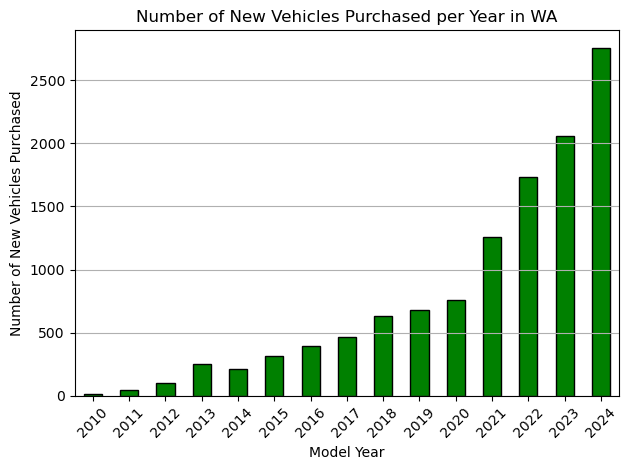

In [14]:
#Group data by 'Year' and count occurences
vehicles_per_year = new_evs.groupby('Year').size()


#Plot a bar graph
vehicles_per_year.plot(kind='bar', color='g', edgecolor='black')
plt.title('Number of New Vehicles Purchased per Year in WA')
plt.xlabel('Model Year')
plt.ylabel('Number of New Vehicles Purchased')
plt.xticks(rotation=45)  
plt.grid(axis='y')  
plt.tight_layout()  
plt.savefig("Outputs/New_Vehicles_bar.png")
plt.show()


Correlation Coefficient between Year and Number of Vehicles Sold: 0.90


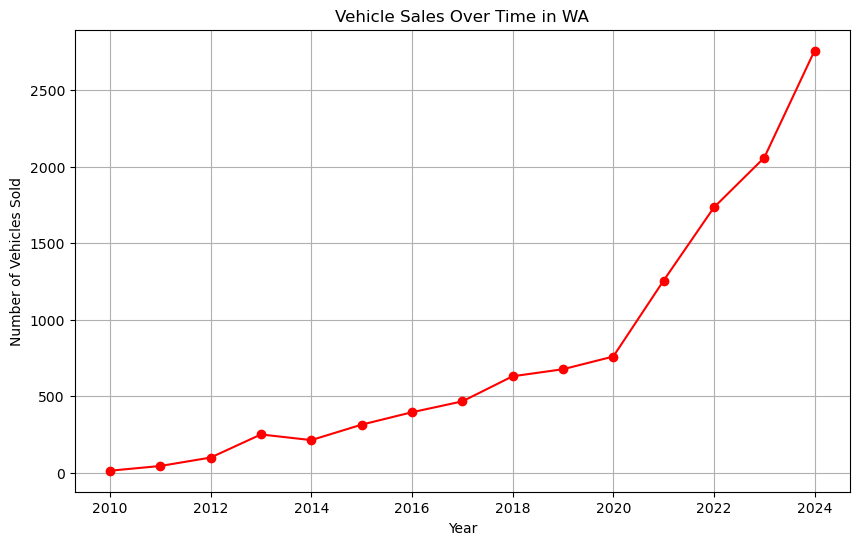

In [15]:
#Get the correlation coefficient between years and number of vehicles sold
vehicles_df = vehicles_per_year.reset_index(name='Number of Vehicles Sold')
correlation = vehicles_df['Year'].corr(vehicles_df['Number of Vehicles Sold'])
print(f"Correlation Coefficient between Year and Number of Vehicles Sold: {correlation:.2f}")

#Line graph of vehicle sales over time
new_evs['Transaction Date'] = pd.to_datetime(new_evs['Transaction Date'], errors='coerce')
sales_over_time = new_evs.groupby(new_evs['Transaction Date'].dt.year).size()

plt.figure(figsize=(10, 6))
sales_over_time.plot(kind='line', marker='o', color='r')
plt.title('Vehicle Sales Over Time in WA')
plt.xlabel('Year')
plt.ylabel('Number of Vehicles Sold')
plt.grid()
plt.savefig("Outputs/EV_sales_over_time.png")
plt.show()

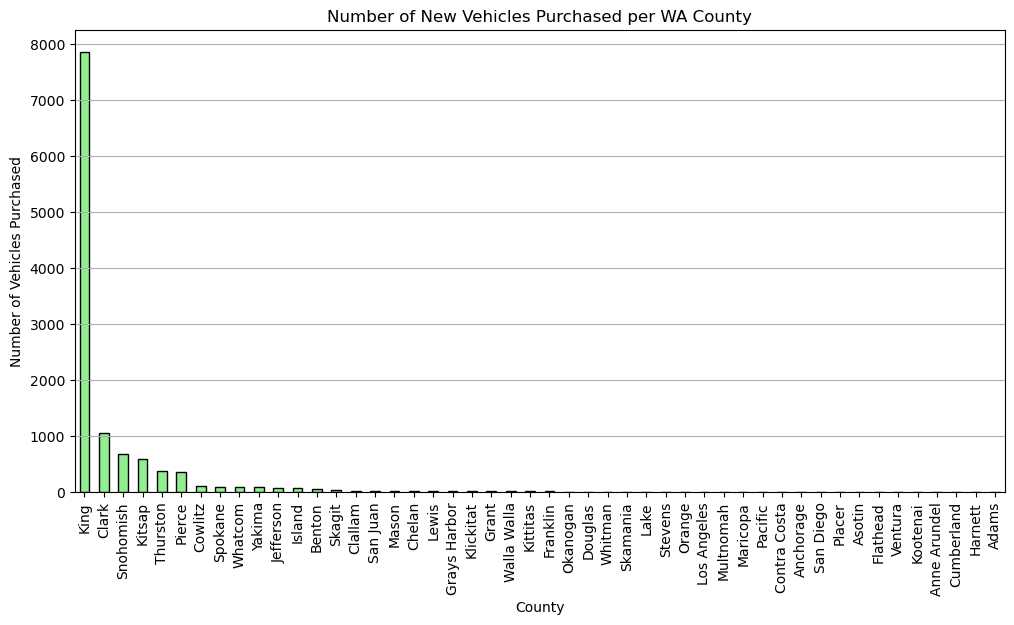

In [16]:
#visualization of new vehicle purchases by county
vehicles_by_county = new_evs['County'].value_counts()
plt.figure(figsize=(12, 6))
vehicles_by_county.plot(kind='bar', color='lightgreen', edgecolor='black')
plt.title('Number of New Vehicles Purchased per WA County')
plt.xlabel('County')
plt.ylabel('Number of Vehicles Purchased')
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.savefig("Outputs/New_EV_per_county.png")
plt.show()